In [1]:
import baostock as bs
import pandas as pd
from IPython.display import display

#### ÁôªÈôÜÁ≥ªÁªü ####
lg = bs.login()
# ÊòæÁ§∫ÁôªÈôÜËøîÂõû‰ø°ÊÅØ
print('login respond error_code:'+lg.error_code)
print('login respond  error_msg:'+lg.error_msg)

#### Ëé∑ÂèñÊ≤™Ê∑±AËÇ°ÂéÜÂè≤KÁ∫øÊï∞ÊçÆ ####
# ËØ¶ÁªÜÊåáÊ†áÂèÇÊï∞ÔºåÂèÇËßÅ‚ÄúÂéÜÂè≤Ë°åÊÉÖÊåáÊ†áÂèÇÊï∞‚ÄùÁ´†ËäÇÔºõ‚ÄúÂàÜÈíüÁ∫ø‚ÄùÂèÇÊï∞‰∏é‚ÄúÊó•Á∫ø‚ÄùÂèÇÊï∞‰∏çÂêå„ÄÇ‚ÄúÂàÜÈíüÁ∫ø‚Äù‰∏çÂåÖÂê´ÊåáÊï∞„ÄÇ
# ÂàÜÈíüÁ∫øÊåáÊ†áÔºödate,time,code,open,high,low,close,volume,amount,adjustflag
# Âë®ÊúàÁ∫øÊåáÊ†áÔºödate,code,open,high,low,close,volume,amount,adjustflag,turn,pctChg
rs = bs.query_history_k_data_plus("sh.000300",
    "date,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,isST",
    start_date='2005-04-08', end_date='2025-04-01',
    frequency="d", adjustflag="3")
print('query_history_k_data_plus respond error_code:'+rs.error_code)
print('query_history_k_data_plus respond  error_msg:'+rs.error_msg)

#### ÊâìÂç∞ÁªìÊûúÈõÜ ####
data_list = []
while (rs.error_code == '0') & rs.next():
    # Ëé∑Âèñ‰∏ÄÊù°ËÆ∞ÂΩïÔºåÂ∞ÜËÆ∞ÂΩïÂêàÂπ∂Âú®‰∏ÄËµ∑
    data_list.append(rs.get_row_data())
result = pd.DataFrame(data_list, columns=rs.fields)

#### ÁªìÊûúÈõÜËæìÂá∫Âà∞csvÊñá‰ª∂ ####   
result.to_csv("./hs300.csv", index=False)
display(result)

#### ÁôªÂá∫Á≥ªÁªü ####
bs.logout()

login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success


date       code       open       high        low      close  \
0     2005-04-08  sh.000300   984.6650  1003.6990   979.5290  1003.4450   
1     2005-04-11  sh.000300  1003.8790  1008.7350   992.7730   995.4210   
2     2005-04-12  sh.000300   993.7110   993.7110   978.2040   978.6970   
3     2005-04-13  sh.000300   987.9500  1006.4990   987.9500  1000.9000   
4     2005-04-14  sh.000300  1004.6400  1006.4160   985.5780   986.9750   
...          ...        ...        ...        ...        ...        ...   
4850  2025-03-26  sh.000300  3930.2073  3942.0260  3916.8607  3919.3566   
4851  2025-03-27  sh.000300  3911.3841  3952.9852  3903.6520  3932.4117   
4852  2025-03-28  sh.000300  3930.7763  3934.2336  3907.3840  3915.1662   
4853  2025-03-31  sh.000300  3905.9815  3928.4482  3872.4030  3887.3056   
4854  2025-04-01  sh.000300  3892.7794  3905.2622  3882.4045  3887.6841   

       preclose       volume             amount adjustflag      turn  \
0      984.7330   1476252600    9151349808.0000          3  0.014011   
1     1003.4450   1593606600   10436232248.0000          3  0.015125   
2      995.4210   1022619300    6479563495.0000          3  0.009705   
3      978.6970   1607168700   10029602129.0000          3  0.015239   
4     1000.9000   1294571000    7813424514.0000          3  0.012275   
...         ...          ...                ...        ...       ...   
4850  3932.2951  13116418700  220943164486.2000          3  0.402191   
4851  3919.3566  12679373800  232173613774.0000          3  0.388788   
4852  3932.4117  12635621400  213379194289.3000          3  0.387446   
4853  3915.1662  16679852300  268480316572.3000          3  0.511454   
4854  3887.3056  14038027400  246041674670.2000          3  0.430440   

     tradestatus     pctChg isST  
0              1   1.900214    0  
1              1  -0.799644    0  
2              1  -1.680093    0  
3              1   2.268629    0  
4              1  -1.391253    0  
...          ...        ...  ...  
4850           1  -0.329032    0  
4851           1   0.333093    0  
4852           1  -0.438548    0  
4853           1  -0.711607    0  
4854           1   0.009737    0  

[4855 rows x 14 columns]

logout success!


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import os


# ========== 1. Êï∞ÊçÆÂä†ËΩΩ ==========
print("Âä†ËΩΩÊï∞ÊçÆ...")
data = pd.read_csv('./hs300.csv')
data['date'] = pd.to_datetime(data['date'])
data = data.sort_values('date')

data_cleaned = data.drop(columns=['date'])  

target = 'close'
features = data.drop(columns=[target, 'date']).values
X = features
y = data[target].values.reshape(-1, 1)

# ========== 2. Êï∞ÊçÆÂΩí‰∏ÄÂåñ ==========
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

print("‚úÖ Ê£ÄÊü•ÂèçÂΩí‰∏ÄÂåñÂêéÊï∞ÊçÆ")
print("val_predicted_prices contains NaN:", np.isnan(val_predicted_prices).any())
print("val_real_prices contains NaN:", np.isnan(val_real_prices).any())

# ========== 3. ÊûÑÈÄ†Â∫èÂàó ==========
def create_sequences(X, y, time_steps=60):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i + time_steps])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 60
X_lstm, y_lstm = create_sequences(X_scaled, y_scaled, time_steps)

# ========== 4. Êï∞ÊçÆÂ¢ûÂº∫ÂáΩÊï∞ ==========
def moving_average_smoothing(data, window_size=3):
    smoothed_data = np.empty_like(data)
    for col in range(data.shape[1]):
        smoothed_data[:, col] = np.convolve(data[:, col], np.ones(window_size) / window_size, mode='same')
    return smoothed_data

def random_noise(data, noise_factor=0.01):
    noise = noise_factor * np.random.randn(*data.shape)
    return data + noise

def time_series_shift(data, max_shift=3):
    shift = np.random.randint(-max_shift, max_shift + 1)
    if shift > 0:
        return np.vstack([np.zeros((shift, data.shape[1])), data[:-shift]])
    elif shift < 0:
        return np.vstack([data[-shift:], np.zeros((-shift, data.shape[1]))])
    else:
        return data


def data_augmentation(X, y, num_augmentations=5):
    X_augmented, y_augmented = [], []
    for i in range(len(X)):
        X_augmented.append(X[i])
        y_augmented.append(y[i])
        for _ in range(num_augmentations):
            X_smooth = moving_average_smoothing(X[i])
            X_noisy = random_noise(X_smooth)
            X_shifted = time_series_shift(X_noisy)
            X_augmented.append(X_shifted)
            y_augmented.append(y[i])
    return np.nan_to_num(np.array(X_augmented)), np.array(y_augmented)


# ========== 5. ÂàíÂàÜËÆ≠ÁªÉ/ÊµãËØïÈõÜÂπ∂Â¢ûÂº∫ ==========
X_train_full, X_test, y_train_full, y_test = train_test_split(X_lstm, y_lstm, test_size=0.2, shuffle=False)
X_train_full_augmented, y_train_full_augmented = data_augmentation(X_train_full, y_train_full)

print("‚úÖ Ê£ÄÊü•Êï∞ÊçÆÂ¢ûÂº∫ÂêéÁöÑËÆ≠ÁªÉÊï∞ÊçÆ")
print("X_train_full_augmented contains NaN:", np.isnan(X_train_full_augmented).any())
print("y_train_full_augmented contains NaN:", np.isnan(y_train_full_augmented).any())

print(f"Original training data shape: {X_train_full.shape}")
print(f"Augmented training data shape: {X_train_full_augmented.shape}")

# ‚úÖ ÂàõÂª∫‰øùÂ≠òÂõæË°®ÁöÑÊñá‰ª∂Â§π
import os
os.makedirs('./figures', exist_ok=True)
# ========== 6. ‰∫§ÂèâÈ™åËØÅËÆ≠ÁªÉ ==========
tscv = TimeSeriesSplit(n_splits=5)
mse_scores, rmse_scores, mae_scores, r2_scores = [], [], [], []

for fold, (train_index, val_index) in enumerate(tscv.split(X_train_full_augmented)):
    print(f"Fold {fold + 1}")

    X_train, X_val = X_train_full_augmented[train_index], X_train_full_augmented[val_index]
    y_train, y_val = y_train_full_augmented[train_index], y_train_full_augmented[val_index]

    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.3))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dropout(0.3))
    model.add(Dense(units=1))

    model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error', metrics=['mae'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                        validation_data=(X_val, y_val), callbacks=[early_stopping])

    # ÂèØËßÜÂåñËÆ≠ÁªÉÊõ≤Á∫ø
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['loss'], label=f'Fold {fold + 1} - Training Loss', color='blue', linewidth=2)
    plt.plot(history.history['val_loss'], label=f'Fold {fold + 1} - Validation Loss', color='orange', linestyle='--', linewidth=2)
    plt.title(f'Fold {fold + 1} - Training and Validation Loss', fontsize=16)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'./figures/loss_fold_{fold + 1}.svg')
    plt.close()

    # gptÊ£ÄÈ™å
    print("val_real_prices contains NaN:", np.isnan(val_real_prices).any())
    print("val_predicted_prices contains NaN:", np.isnan(val_predicted_prices).any())
    print("val_predicted_prices sample:", val_predicted_prices[:5])


    # Âú®È™åËØÅÈõÜ‰∏äËØÑ‰º∞
    val_predictions = model.predict(X_val)
    print("‚úÖ Ê£ÄÊü•Ê®°ÂûãÈ¢ÑÊµãËæìÂá∫")
    print("val_predictions contains NaN:", np.isnan(val_predictions).any())

    val_predicted_prices = scaler_y.inverse_transform(val_predictions)
    val_real_prices = scaler_y.inverse_transform(y_val.reshape(-1, 1))
    
    # ÂèØÈÄâÂä†ÁöÑ NaN Êé©Á†ÅÂ§ÑÁêÜ
    mask = ~np.isnan(val_real_prices).flatten() & ~np.isnan(val_predicted_prices).flatten()
    val_mse = mean_squared_error(val_real_prices[mask], val_predicted_prices[mask])

    val_mse = mean_squared_error(val_real_prices, val_predicted_prices)
    val_rmse = np.sqrt(val_mse)
    val_mae = mean_absolute_error(val_real_prices, val_predicted_prices)
    val_r2 = r2_score(val_real_prices, val_predicted_prices)

    mse_scores.append(val_mse)
    rmse_scores.append(val_rmse)
    mae_scores.append(val_mae)
    r2_scores.append(val_r2)

# ========== 7. ËæìÂá∫‰∫§ÂèâÈ™åËØÅÂπ≥ÂùáÁªìÊûú ==========
print(f"Mean MSE: {np.mean(mse_scores)}")
print(f"Mean RMSE: {np.mean(rmse_scores)}")
print(f"Mean MAE: {np.mean(mae_scores)}")
print(f"Mean R¬≤: {np.mean(r2_scores)}")


Âä†ËΩΩÊï∞ÊçÆ...
‚úÖ Ê£ÄÊü•ÂèçÂΩí‰∏ÄÂåñÂêéÊï∞ÊçÆ
val_predicted_prices contains NaN: False
val_real_prices contains NaN: False
‚úÖ Ê£ÄÊü•Êï∞ÊçÆÂ¢ûÂº∫ÂêéÁöÑËÆ≠ÁªÉÊï∞ÊçÆ
X_train_full_augmented contains NaN: False
y_train_full_augmented contains NaN: False
Original training data shape: (3836, 60, 11)
Augmented training data shape: (23016, 60, 11)
Fold 1
Epoch 1/100
120/120 [==============================] - 8s 42ms/step - loss: 0.0845 - mae: 0.1557 - val_loss: 0.0215 - val_mae: 0.0369
Epoch 2/100
120/120 [==============================] - 4s 36ms/step - loss: 0.0274 - mae: 0.0653 - val_loss: 0.0190 - val_mae: 0.0356
Epoch 3/100
120/120 [==============================] - 4s 37ms/step - loss: 0.0236 - mae: 0.0579 - val_loss: 0.0176 - val_mae: 0.0379
Epoch 4/100
120/120 [==============================] - 4s 36ms/step - loss: 0.0208 - mae: 0.0528 - val_loss: 0.0161 - val_mae: 0.0399
Epoch 5/100
120/120 [==============================] - 4s 38ms/step - loss: 0.0182 - mae: 0.0484 - val_loss: 0.01

KeyboardInterrupt: 

 6/30 [=====>........................] - ETA: 0s

d:\anaconda\envs\tf_env\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


30/30 [==============================] - 0s 12ms/step


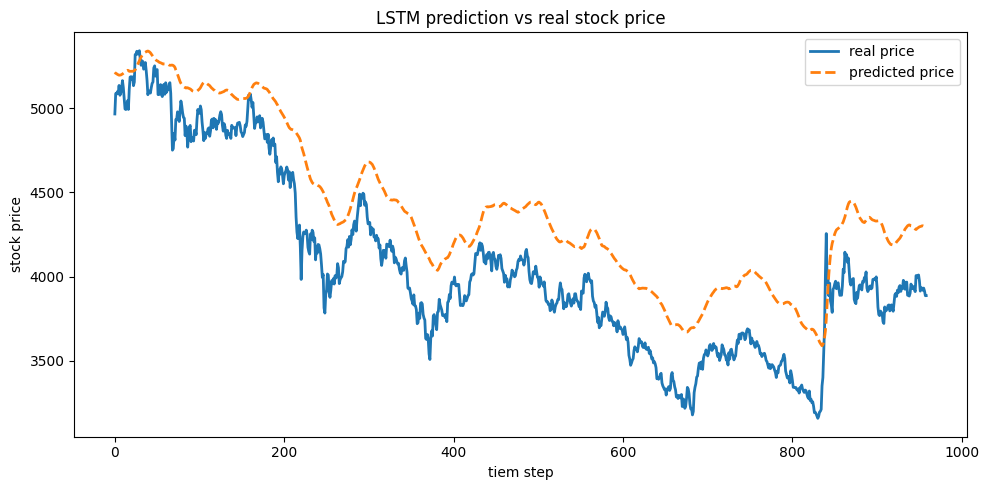

In [14]:
model.save('lstm_final_model.h5')
import pickle
with open('cv_results.pkl', 'wb') as f:
    pickle.dump((mse_scores, rmse_scores, mae_scores, r2_scores), f)

final_predictions = model.predict(X_test)
final_predicted_prices = scaler_y.inverse_transform(final_predictions)
final_real_prices = scaler_y.inverse_transform(y_test)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(final_real_prices, label='real price', linewidth=2)
plt.plot(final_predicted_prices, label='predicted price', linestyle='--', linewidth=2)
plt.title('LSTM prediction vs real stock price')
plt.xlabel('tiem step')
plt.ylabel('stock price')
plt.legend()
plt.tight_layout()
plt.show()


üìå È°πÁõÆÂêçÁß∞ÔºöÂü∫‰∫éLSTMÁöÑÊ≤™Ê∑±300ËÇ°‰ª∑È¢ÑÊµã
üìÖ Ê®°ÂûãËÆ≠ÁªÉÊó∂Èó¥Ôºö‰Ω†Ëá™Â∑±Âä†‰∏äÊó∂Èó¥Êà≥Âì¶
üìà ‰ΩøÁî®Ê®°ÂûãÔºöKeras Sequential LSTM x2 + Dropout + Dense
üì¶ Êï∞ÊçÆÂ¢ûÂº∫ÔºöÂπ≥Êªë + Âä†Âô™ + Êó∂Èó¥Èîô‰Ωç
ËÆ≠ÁªÉÊ†∑Êú¨Êï∞ÔºàÂ¢ûÂº∫ÂâçÔºâÔºö3836
ËÆ≠ÁªÉÊ†∑Êú¨Êï∞ÔºàÂ¢ûÂº∫ÂêéÔºâÔºö23016
LSTM Êó∂Èó¥Ê≠•ÈïøÔºö60
ÁâπÂæÅÁª¥Â∫¶Êï∞Ôºö11
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 60, 50)            12400     
                                                                 
 dropout_22 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_23 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_23 (Dropout)        (None, 50)                0         
                                       

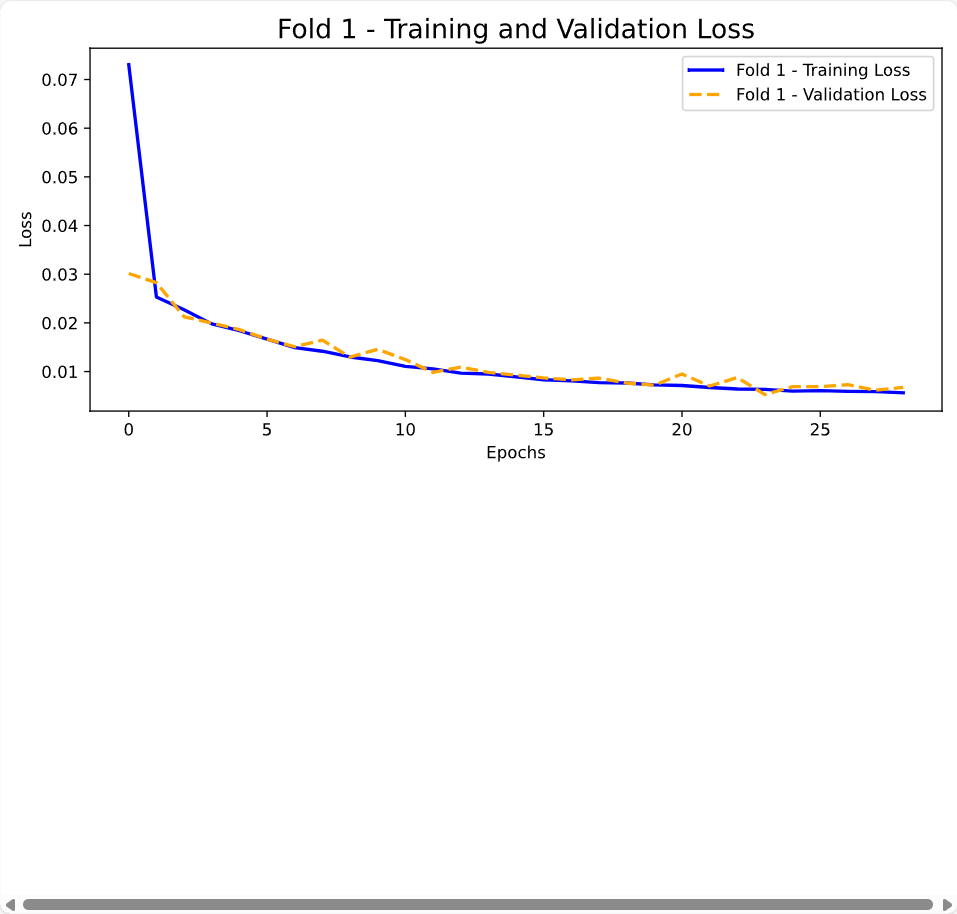

30/30 [==============================] - 0s 12ms/step


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_14308\2101943180.py:38: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_14308\2101943180.py:38: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_14308\2101943180.py:38: UserWarning: Glyph 27493 (\N{CJK UNIFIED IDEOGRAPH-6B65}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_14308\2101943180.py:38: UserWarning: Glyph 32929 (\N{CJK UNIFIED IDEOGRAPH-80A1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_14308\2101943180.py:38: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public

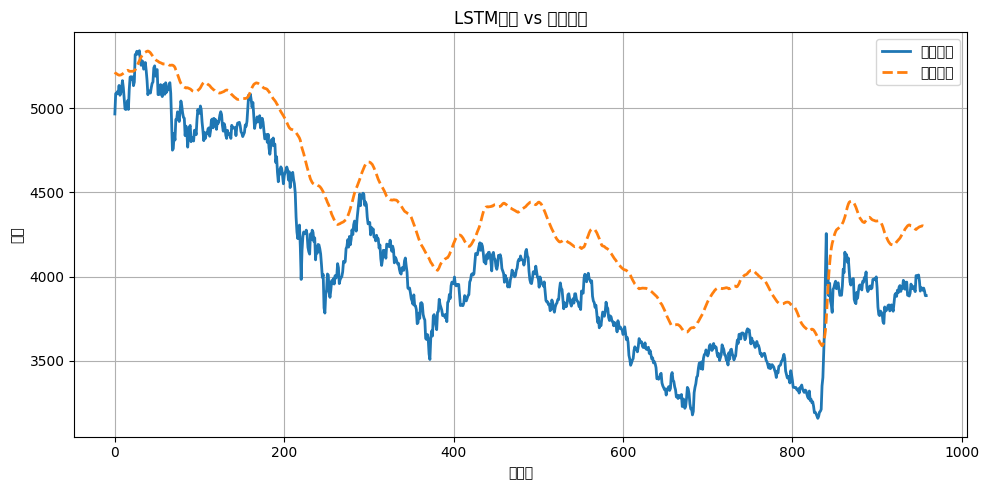

üìä Ê®°ÂûãËØÑ‰º∞Ôºà‰∫§ÂèâÈ™åËØÅÂπ≥ÂùáÔºâÔºö
Mean MSE: nan
Mean RMSE: nan
Mean MAE: nan
Mean R¬≤: nan

‚úÖ Âª∫ËÆÆ‰ºòÂåñÊñπÂêëÔºö
1. Â∞ùËØïÂä†ÂÖ•Êõ¥Â§öÂ§ñÈÉ®ÁâπÂæÅÔºàÂÆèËßÇÊåáÊ†á„ÄÅÊîøÁ≠ñÈ¢ÑÊúüÁ≠âÔºâ
2. Â∞ùËØï‰ΩøÁî® Attention„ÄÅGRU„ÄÅÊàñ Transformer Êõø‰ª£ LSTM
3. Â¢ûÂä†Ê®°Âûã‰øùÂ≠òÈ¢ëÁéáÔºåÊîØÊåÅÁ∫ø‰∏äÂÆûÊó∂È¢ÑÊµã
4. ÂàÜÊùøÂùóÂª∫Ê®°ÊàñÂå∫Èó¥Âª∫Ê®°ÔºåÊèêÈ´ò‰∏™ËÇ°ÈÄÇÂ∫îÊÄß


d:\anaconda\envs\tf_env\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\anaconda\envs\tf_env\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ===== 1. È°πÁõÆÁÆÄ‰ªã =====
print("üìå È°πÁõÆÂêçÁß∞ÔºöÂü∫‰∫éLSTMÁöÑÊ≤™Ê∑±300ËÇ°‰ª∑È¢ÑÊµã")
print("üìÖ Ê®°ÂûãËÆ≠ÁªÉÊó∂Èó¥Ôºö‰Ω†Ëá™Â∑±Âä†‰∏äÊó∂Èó¥Êà≥Âì¶")
print("üìà ‰ΩøÁî®Ê®°ÂûãÔºöKeras Sequential LSTM x2 + Dropout + Dense")
print("üì¶ Êï∞ÊçÆÂ¢ûÂº∫ÔºöÂπ≥Êªë + Âä†Âô™ + Êó∂Èó¥Èîô‰Ωç")

# ===== 2. Êï∞ÊçÆÁª¥Â∫¶ÂíåÂü∫Êú¨‰ø°ÊÅØ =====
print(f"ËÆ≠ÁªÉÊ†∑Êú¨Êï∞ÔºàÂ¢ûÂº∫ÂâçÔºâÔºö{3836}")
print(f"ËÆ≠ÁªÉÊ†∑Êú¨Êï∞ÔºàÂ¢ûÂº∫ÂêéÔºâÔºö{23016}")
print(f"LSTM Êó∂Èó¥Ê≠•ÈïøÔºö{60}")
print(f"ÁâπÂæÅÁª¥Â∫¶Êï∞Ôºö{11}")

# ===== 3. Ê®°ÂûãÁªìÊûÑÂ±ïÁ§∫ =====
model.summary()

# ===== 4. ÂèØËßÜÂåñ‰∏ÄÁªÑ Fold ÁöÑËÆ≠ÁªÉÊçüÂ§±ÔºàlossÊõ≤Á∫øÂ∑≤Áªè‰øùÂ≠òËøáÔºâ =====
from IPython.display import Image, display
display(Image(filename='c:/Users/Èí±Ê¢ìÁ£ä/Desktop/507project/figures/loss_fold_1.png'))  # ÂÖ∑‰Ωì‰øùÂ≠òÁöÑË∑ØÂæÑ

# ===== 5. Âú®ÊµãËØïÈõÜ‰∏äÂÅöÈ¢ÑÊµãÂπ∂ÂèçÂΩí‰∏ÄÂåñ =====
final_predictions = model.predict(X_test)
final_predicted_prices = scaler_y.inverse_transform(final_predictions)
final_real_prices = scaler_y.inverse_transform(y_test)

# ===== 6. ÁªòÂõæÔºöÈ¢ÑÊµã vs ÂÆûÈôÖ =====
plt.figure(figsize=(10, 5))
plt.plot(final_real_prices, label='ÁúüÂÆû‰ª∑Ê†º', linewidth=2)
plt.plot(final_predicted_prices, label='È¢ÑÊµã‰ª∑Ê†º', linestyle='--', linewidth=2)
plt.title('LSTMÈ¢ÑÊµã vs ÁúüÂÆûËÇ°‰ª∑')
plt.xlabel('Êó∂Èó¥Ê≠•')
plt.ylabel('ËÇ°‰ª∑')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ===== 7. Ê±áÊÄªËØÑ‰ª∑ÊåáÊ†áÔºà‰∫§ÂèâÈ™åËØÅÔºâ =====
print("üìä Ê®°ÂûãËØÑ‰º∞Ôºà‰∫§ÂèâÈ™åËØÅÂπ≥ÂùáÔºâÔºö")
print(f"Mean MSE: {np.mean(mse_scores):.2f}")
print(f"Mean RMSE: {np.mean(rmse_scores):.2f}")
print(f"Mean MAE: {np.mean(mae_scores):.2f}")
print(f"Mean R¬≤: {np.mean(r2_scores):.4f}")

# ===== 8. ‰∏ã‰∏ÄÊ≠•Âª∫ËÆÆ =====
print("\n‚úÖ Âª∫ËÆÆ‰ºòÂåñÊñπÂêëÔºö")
print("1. Â∞ùËØïÂä†ÂÖ•Êõ¥Â§öÂ§ñÈÉ®ÁâπÂæÅÔºàÂÆèËßÇÊåáÊ†á„ÄÅÊîøÁ≠ñÈ¢ÑÊúüÁ≠âÔºâ")
print("2. Â∞ùËØï‰ΩøÁî® Attention„ÄÅGRU„ÄÅÊàñ Transformer Êõø‰ª£ LSTM")
print("3. Â¢ûÂä†Ê®°Âûã‰øùÂ≠òÈ¢ëÁéáÔºåÊîØÊåÅÁ∫ø‰∏äÂÆûÊó∂È¢ÑÊµã")
print("4. ÂàÜÊùøÂùóÂª∫Ê®°ÊàñÂå∫Èó¥Âª∫Ê®°ÔºåÊèêÈ´ò‰∏™ËÇ°ÈÄÇÂ∫îÊÄß")


In [16]:
import os
print("ÂΩìÂâçÂ∑•‰ΩúË∑ØÂæÑÊòØÔºö", os.getcwd())


ÂΩìÂâçÂ∑•‰ΩúË∑ØÂæÑÊòØÔºö c:\Users\Èí±Ê¢ìÁ£ä\Desktop\507project


In [20]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 60, 50)            12400     
                                                                 
 dropout_22 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_23 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_23 (Dropout)        (None, 50)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                                 
Total params: 32651 (127.54 KB)
Trainable params: 32651 (127.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
